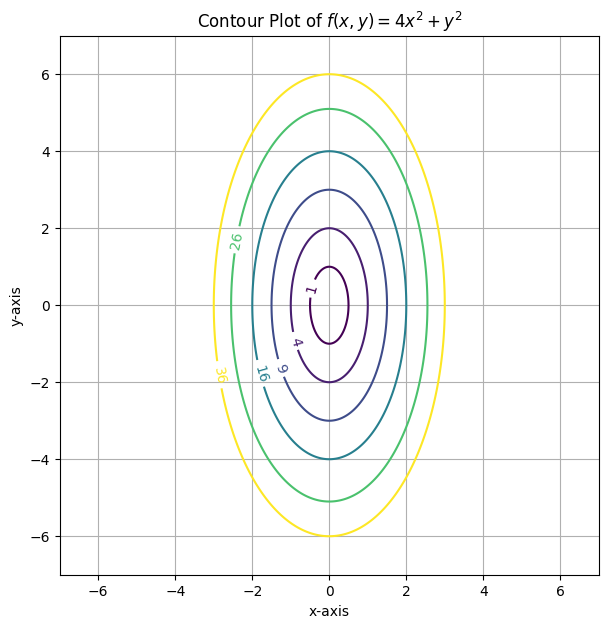

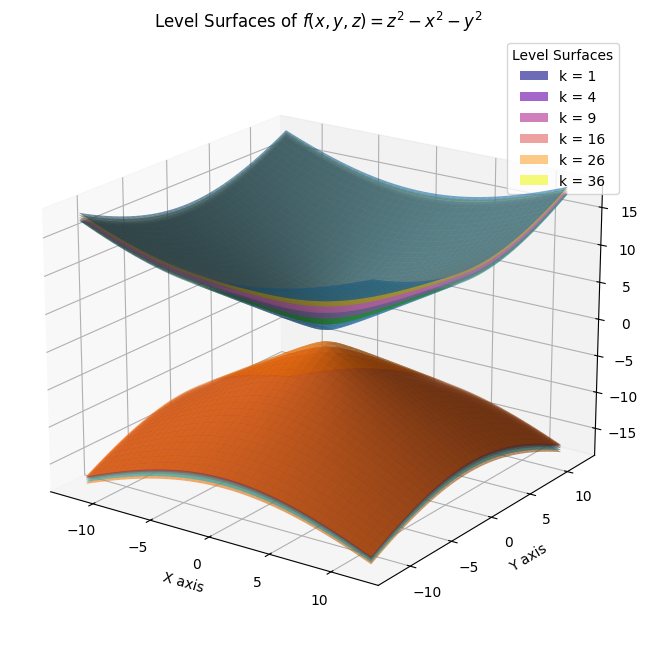

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# 2D Contour Plot for f(x,y) = 4x² + y²
x = np.linspace(-7, 7, 400)
y = np.linspace(-7, 7, 400)
X, Y = np.meshgrid(x, y)
Z = 4*X**2 + Y**2

plt.figure(figsize=(8, 7))
contours = plt.contour(X, Y, Z, levels=[1, 4, 9, 16, 26, 36])
plt.clabel(contours, inline=True, fontsize=10)
plt.title('Contour Plot of $f(x,y) = 4x^2 + y^2$')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

# 3D Level Surfaces for f(x,y,z) = z² - x² - y²
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-12, 12, 200)
y = np.linspace(-12, 12, 200)
X, Y = np.meshgrid(x, y)

k_values = [1, 4, 9, 16, 26, 36]
colors = plt.cm.plasma(np.linspace(0, 1, len(k_values)))

for i, k in enumerate(k_values):
    Z_squared = k + X**2 + Y**2
    Z_pos = np.sqrt(Z_squared)
    Z_neg = -np.sqrt(Z_squared)
    
    ax.plot_surface(X, Y, Z_pos, alpha=0.6, rstride=5, cstride=5)
    ax.plot_surface(X, Y, Z_neg, alpha=0.6, rstride=5, cstride=5)
    

# Add legend
legend_proxies = [plt.Rectangle((0, 0), 1, 1, fc=colors[i], alpha=0.6) for i in range(len(k_values))]
ax.legend(legend_proxies, [f'k = {k}' for k in k_values], title='Level Surfaces')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Level Surfaces of $f(x,y,z) = z^2 - x^2 - y^2$')
ax.view_init(elev=20., azim=-55)
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arups\AppData\Local\Temp\ipykernel_1500\3161016758.py:10: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title('$f(x, y) = y^2 - 2y \cos x$')
C:\Users\arups\AppData\Local\Temp\ipykernel_1500\3161016758.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('$f(x, y) = |\sin x \sin y|$')


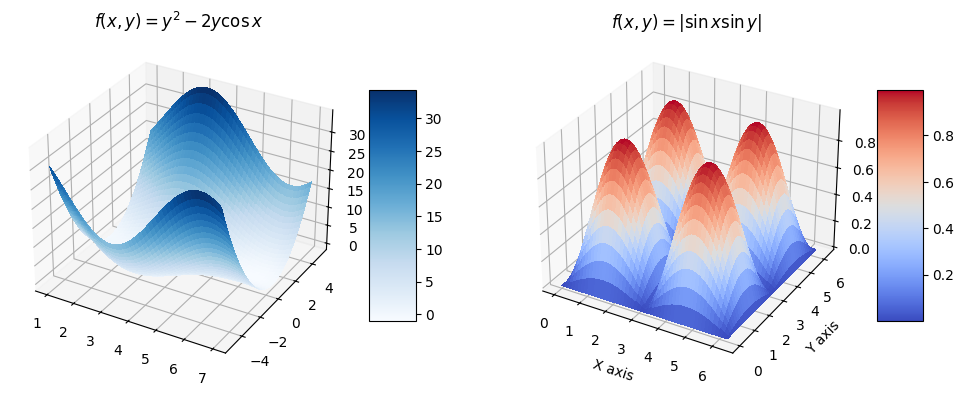

In [14]:
x = np.linspace(1, 7, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = Y**2 - 2 * Y * np.cos(X)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z1, cmap=cm.Blues, linewidth=1, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('$f(x, y) = y^2 - 2y \cos x$')

# Second 3D plot
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z2 = np.abs(np.sin(X) * np.sin(Y))

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm, linewidth=1, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x, y) = |\sin x \sin y|$')
plt.show()